In [1]:
from ergochemics.mapping import get_reaction_center
from rdkit import Chem
from ergochemics.draw import draw_reaction, draw_molecule
from IPython.display import SVG
import numpy as np
import polars as pl

def get_lhs_block_rc(am_smarts: str) -> list[int]:
    return get_reaction_center(am_smarts, mode="combined")[0]

In [2]:
study = "bottle25" # test

In [3]:
prs = pl.read_parquet(
    f"/home/stef/quest_data/bottle/results/{study}/predicted_reactions.parquet"
)
prs.head()

id,smarts,am_smarts,dxgb_label,rxn_sims,analogue_ids,rules,reversed
str,str,str,i32,list[f32],list[str],list[str],bool
"""R8d4487b5ef3d6a1c0a6ac27b2e63e…","""CC(C)(COC(=O)C(C)(C)CO)C(=O)O.…","""[CH3:1][C:2]([CH3:3])([CH2:4][…",1,"[0.458831, 0.172062]","[""2240"", ""2240""]","[""mechinferred_dt_2_rules:1386"", ""mechinferred_dt_2_rules:1386"", ""mechinferred_dt_2_rules:1386""]",null
"""R20d0f82c8e2a0f6b78fe2ce671550…","""CC(C)(CO)C(O)O.NC(=O)c1ccc[n+]…","""[CH3:1][C:2]([CH3:3])([CH2:4][…",0,[],[],"[""mechinferred_dt_2_rules:1156""]",null
"""Rde52e68a442a1d4116ab2f65615de…","""NC(=O)c1ccc[n+](C2OC(COP(=O)(O…","""[NH2:1][C:2](=[O:3])[c:4]1[cH:…",0,[],[],"[""mechinferred_dt_2_rules:4114"", ""mechinferred_dt_2_rules:1842""]",null
"""R0d8049cd52e69e381c707a3b72e89…","""*C(=O)CCC(NC(=O)c1ccc(NCC2CNc3…","""[*:1][C:2](=[O:3])[CH2:4][CH2:…",0,"[1.0, 1.0]","[""7987"", ""7987""]","[""mechinferred_dt_2_rules:2034""]",null
"""Reeca2cd1dc09365a6647088d721d4…","""C=CC(=C)C.O=P(O)(O)OP(=O)(O)O>…","""[CH2:5]=[CH:4][C:2](=[CH2:1])[…",0,"[1.0, 1.0, … 0.688247]","[""13736"", ""13736"", … ""5430""]","[""mechinferred_dt_2_rules:2743""]",null


In [4]:
paths = pl.read_parquet(
    f"/home/stef/quest_data/bottle/results/{study}/found_paths.parquet"
)
paths.head()

id,starter,target,reactions,dg_opt,dg_err,starter_id,target_id,mdf,mean_max_rxn_sim,mean_mean_rxn_sim,min_max_rxn_sim,min_mean_rxn_sim,feasibility_frac
str,str,str,list[str],list[f32],list[f32],str,str,f32,f32,f32,f32,f32,f32
"""Pd34d57c4ac3f17b7d8c8fab394dd3…","""valine""","""3hpa""","[""R3c35c8bc6d795a41c9bab135bc70ab034a05c7dbfb1effd2d528da3339e75fa6"", ""Rcd7728f52223f7e97728eec40f0aca58282470b0e7dcc412cb68e42310e778ef"", … ""R91837552f2faefa198c79c6e55d5f72a444f138a78649eb3dfe492e65bba19f3""]",null,null,"""C2c0fd88a16e4b0a0e7eb28210b991…","""Ca44a84be6f833fe631009a55d05e4…",null,0.554222,0.554222,0.5,0.5,0.75
"""P3d7e2b5bb025d20cec11eac9bae3a…","""valine""","""3hpa""","[""Rd4dbba9b573905855d9da01cf31985af9e9ba0f9cbb8ac22af3dcf4b94dc529c"", ""R25818b5d83503a23ff3d2b0e7f53ed3284f8615fff98b8a430ef7fadf0afa964"", … ""Rbd9771e6411c1735bf128c01c59b8a130185c22c4f07c878356ceaddae00f7b8""]",null,null,"""C2c0fd88a16e4b0a0e7eb28210b991…","""Ca44a84be6f833fe631009a55d05e4…",null,0.636384,0.46089,0.0,0.0,0.4
"""P0c2502c48e53e00c81eec4e8e5976…","""valine""","""3hpa""","[""Rd4dbba9b573905855d9da01cf31985af9e9ba0f9cbb8ac22af3dcf4b94dc529c"", ""R25818b5d83503a23ff3d2b0e7f53ed3284f8615fff98b8a430ef7fadf0afa964"", … ""Rbd9771e6411c1735bf128c01c59b8a130185c22c4f07c878356ceaddae00f7b8""]",null,null,"""C2c0fd88a16e4b0a0e7eb28210b991…","""Ca44a84be6f833fe631009a55d05e4…",null,0.595207,0.428303,0.0,0.0,0.4
"""Pa7dd899fb359f72c417197aff7e65…","""valine""","""3hpa""","[""Rd4dbba9b573905855d9da01cf31985af9e9ba0f9cbb8ac22af3dcf4b94dc529c"", ""R25818b5d83503a23ff3d2b0e7f53ed3284f8615fff98b8a430ef7fadf0afa964"", … ""R91837552f2faefa198c79c6e55d5f72a444f138a78649eb3dfe492e65bba19f3""]",null,null,"""C2c0fd88a16e4b0a0e7eb28210b991…","""Ca44a84be6f833fe631009a55d05e4…",null,0.633485,0.457991,0.0,0.0,0.6
"""P5059eaec99e8a59f40aec85216b93…","""valine""","""3hpa""","[""Rd4dbba9b573905855d9da01cf31985af9e9ba0f9cbb8ac22af3dcf4b94dc529c"", ""R25818b5d83503a23ff3d2b0e7f53ed3284f8615fff98b8a430ef7fadf0afa964"", … ""R91837552f2faefa198c79c6e55d5f72a444f138a78649eb3dfe492e65bba19f3""]",null,null,"""C2c0fd88a16e4b0a0e7eb28210b991…","""Ca44a84be6f833fe631009a55d05e4…",null,0.592308,0.425404,0.0,0.0,0.6


Reaction 1: R9e4be47ac1c620b9421676c03e14200154e8ab08bd90ab20fed9dae8fe0054f7


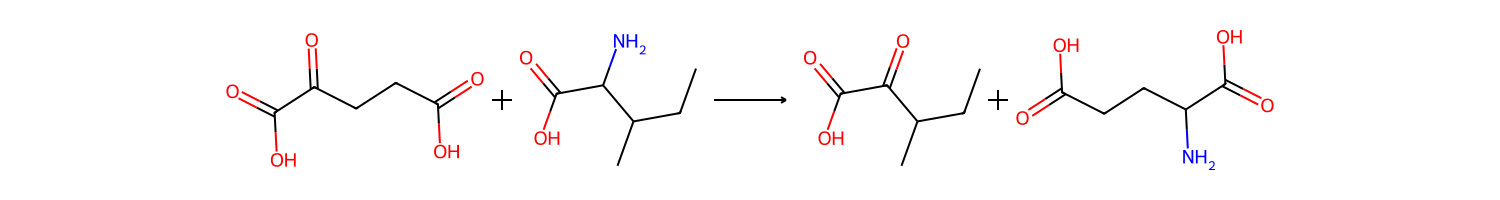

Reaction 2: R4a51c507e0029990d4728aee7476c4b3b71d1a8a45ebcf8d739ecfdeac01965f


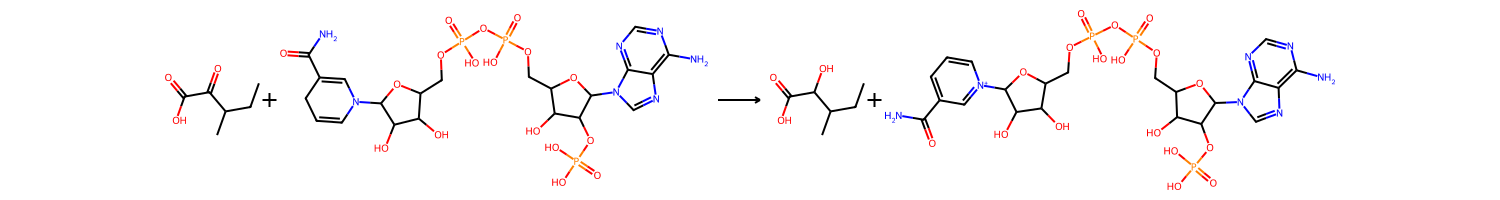

Reaction 3: R911b2dd7b4dd9a29f0bd7d84ca8e57ea7e77bbad67a8f07bd2697813e3c75628


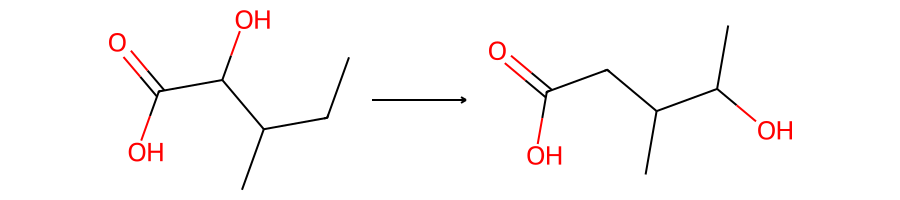

Reaction 4: R83707e0a53210a8928c08edb9a934e8a6bcc7970c17c627f2d29d4ae5b208b55


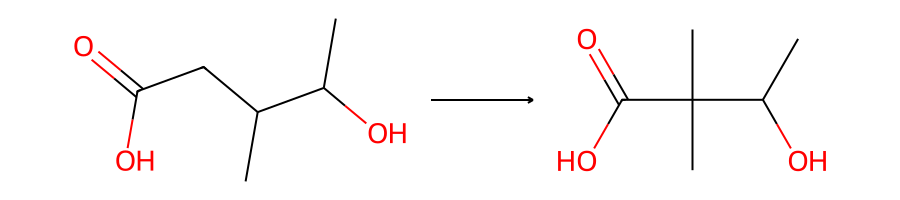

In [5]:
pid = 'Pad8cf7b44f6eb9de803346df1d4a118e07a22008'
rids = paths.filter(pl.col("id") == pid)["reactions"].to_list()[0]
path = prs.filter(pl.col("id").is_in(rids)).sort(
    pl.col("id").replace({id: idx for idx, id in enumerate(rids)})
).select(pl.col("smarts"), pl.col("id"))
for i, row in enumerate(path.iter_rows(named=True)):
    print(f"Reaction {i+1}: {row['id']}")
    display(
        SVG(
            draw_reaction(row['smarts'])
        )
    )

In [6]:
prs = pl.scan_parquet(
    f"/home/stef/quest_data/bottle/results/{study}/predicted_reactions.parquet"
).filter(
    pl.col("id").is_in(
        [
            "R911b2dd7b4dd9a29f0bd7d84ca8e57ea7e77bbad67a8f07bd2697813e3c75628",
            "R83707e0a53210a8928c08edb9a934e8a6bcc7970c17c627f2d29d4ae5b208b55"
        ]
    )
).collect()
prs.head()

id,smarts,am_smarts,dxgb_label,rxn_sims,analogue_ids,rules,reversed
str,str,str,i32,list[f32],list[str],list[str],bool
"""R83707e0a53210a8928c08edb9a934…","""CC(O)C(C)CC(=O)O>>CC(O)C(C)(C)…","""[CH3:1][CH:2]([OH:3])[CH:4]([C…",0,[0.5],"[""12848""]","[""mechinferred_dt_98_rules:2003""]",null
"""R911b2dd7b4dd9a29f0bd7d84ca8e5…","""CCC(C)C(O)C(=O)O>>CC(O)C(C)CC(…","""[CH3:7][CH2:6][CH:4]([CH3:5])[…",0,"[0.485071, 0.411765]","[""15268"", ""16573""]","[""mechinferred_dt_98_rules:1100""]",null


Reaction 1: R83707e0a53210a8928c08edb9a934e8a6bcc7970c17c627f2d29d4ae5b208b55


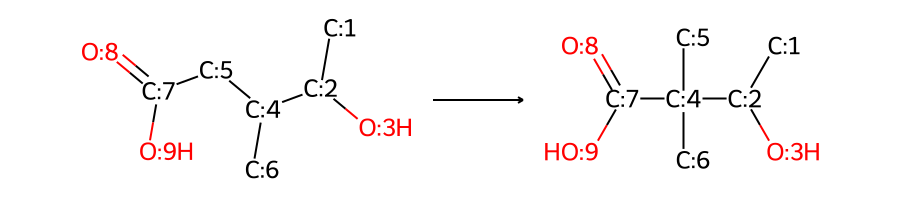

Reaction 2: R911b2dd7b4dd9a29f0bd7d84ca8e57ea7e77bbad67a8f07bd2697813e3c75628


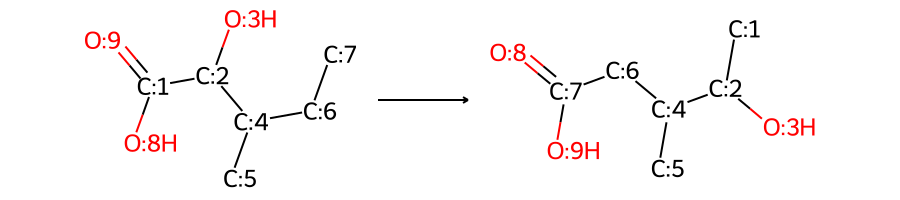

In [7]:
for i, row in enumerate(prs.iter_rows(named=True)):
    print(f"Reaction {i+1}: {row['id']}")
    display(
        SVG(
            draw_reaction(row['am_smarts'])
        )
    )

In [8]:
from ergochemics.mapping import operator_map_reaction

In [9]:
rxn = row["smarts"]
rule = "([#6:1].[#8:2]=[#6:3]-[#8:4])>>([#6:3].[#8:4]=[#6:1]-[#8:2])"
res = operator_map_reaction(rxn, rule)
res

[08:43:14] Initializing MetalDisconnector
[08:43:14] Running MetalDisconnector
[08:43:14] Initializing Normalizer
[08:43:14] Running Normalizer
[08:43:14] Initializing MetalDisconnector
[08:43:14] Running MetalDisconnector
[08:43:14] Initializing Normalizer
[08:43:14] Running Normalizer


OperatorMapResult(did_map=True, aligned_smarts='CCC(C)C(O)C(=O)O>>CC(O)C(C)CC(=O)O', atom_mapped_smarts='[CH3:3][CH2:5][CH:6]([CH3:7])[CH:8]([OH:9])[C:1](=[O:4])[OH:2]>>[CH3:1][CH:8]([OH:9])[CH:6]([CH3:7])[CH2:5][C:3](=[O:2])[OH:4]', reaction_center=(((0, 7, 6, 8),), ((0, 6, 7, 8),)))

In [10]:
mechinferred_98 = pl.read_csv(
    "/home/stef/bottle/artifacts/rules/mechinferred_dt_98_rules_w_coreactants.tsv",
    separator="\t",
)

rule_smarts = mechinferred_98.filter(
    pl.col("Name") == "1100_0"
)["SMARTS"][0]

In [11]:
rule_smarts

'([C&D1&v4&H3&0*&!R&z0:1].[C&D3&v4&H0&0*&!R&z2:2](=[O&D1&v2&H0&0*&!R:3])-[O&D1&v2&H1&0*&!R:4])>>([C&D1&v4&H3&0*&!R&z0:2].[C&D3&v4&H0&0*&!R&z2:1](=[O&D1&v2&H0&0*&!R:4])-[O&D1&v2&H1&0*&!R:3])'

In [12]:
Chem.MolFromSmarts(rule_smarts.split(">>")[0])

[08:43:14] SMARTS Parse Error: syntax error while parsing: ([C&D1&v4&H3&0*&!R&z0:1].[C&D3&v4&H0&0*&!R&z2:2](=[O&D1&v2&H0&0*&!R:3])-[O&D1&v2&H1&0*&!R:4])
[08:43:14] SMARTS Parse Error: Failed parsing SMARTS '([C&D1&v4&H3&0*&!R&z0:1].[C&D3&v4&H0&0*&!R&z2:2](=[O&D1&v2&H0&0*&!R:3])-[O&D1&v2&H1&0*&!R:4])' for input: '([C&D1&v4&H3&0*&!R&z0:1].[C&D3&v4&H0&0*&!R&z2:2](=[O&D1&v2&H0&0*&!R:3])-[O&D1&v2&H1&0*&!R:4])'


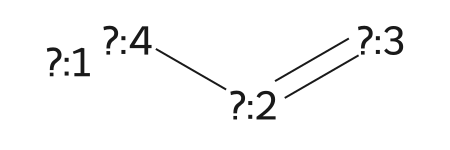

In [13]:
Chem.MolFromSmarts('[C&D1&v4&H3&0*&!R&z0:1].[C&D3&v4&H0&0*&!R&z2:2](=[O&D1&v2&H0&0*&!R:3])-[O&D1&v2&H1&0*&!R:4]')

In [14]:

rule_smarts

'([C&D1&v4&H3&0*&!R&z0:1].[C&D3&v4&H0&0*&!R&z2:2](=[O&D1&v2&H0&0*&!R:3])-[O&D1&v2&H1&0*&!R:4])>>([C&D1&v4&H3&0*&!R&z0:2].[C&D3&v4&H0&0*&!R&z2:1](=[O&D1&v2&H0&0*&!R:4])-[O&D1&v2&H1&0*&!R:3])'

In [15]:
mappings = pl.read_parquet(
    "/home/stef/bottle/artifacts/rxn_x_rule_mapping/sprhea_v3_ns_x_rc_plus_0_rules.parquet"
)
mutases = mappings.filter(
    pl.col("rxn_id").is_in(prs['analogue_ids'].explode().to_list())
)
mutases.head()

rxn_id,smarts,am_smarts,rule,template_aidxs,rule_id
str,str,str,str,str,i64
"""12848""","""CC(C)CC(=O)SCCNC(=O)CCNC(=O)C(…","""[CH3:4][CH:2]([CH3:5])[CH2:1][…","""([#6:1].[#6:2]-[#6:3])>>([#6:2…","""1,3,4>>0,1,4""",181
"""15268""","""CCC(C(=O)O)C(=O)SCCNC(=O)CCNC(…","""[CH3:3][CH2:5][CH:6]([C:1](=[O…","""([#6:1].[#8:2]=[#6:3]-[#8:4])>…","""0,4,3,5>>0,3,4,5""",13
"""16573""","""CC(CC(=O)O)C(=O)SCCNC(=O)CCNC(…","""[CH3:3][CH:5]([CH2:6][C:1](=[O…","""([#6:1].[#8:2]=[#6:3]-[#8:4])>…","""0,4,3,5>>0,3,4,5""",13


In [16]:
for i, row in enumerate(mutases.iter_rows(named=True)):
    print(row['rule'])

([#6:1].[#6:2]-[#6:3])>>([#6:2].[#6:1]-[#6:3])
([#6:1].[#8:2]=[#6:3]-[#8:4])>>([#6:3].[#8:4]=[#6:1]-[#8:2])
([#6:1].[#8:2]=[#6:3]-[#8:4])>>([#6:3].[#8:4]=[#6:1]-[#8:2])


In [17]:
mappings = pl.read_parquet(
    "/home/stef/bottle/artifacts/rxn_x_rule_mapping/sprhea_v3_ns_x_rc_plus_0_rules.parquet"
)
isom = mappings.filter(
    pl.col("rule_id") == 13
)
print(len(isom))


2


In [27]:
isom

rxn_id,smarts,am_smarts,rule,template_aidxs,rule_id
str,str,str,str,str,i64
"""15268""","""CCC(C(=O)O)C(=O)SCCNC(=O)CCNC(…","""[CH3:3][CH2:5][CH:6]([C:1](=[O…","""([#6:1].[#8:2]=[#6:3]-[#8:4])>…","""0,4,3,5>>0,3,4,5""",13
"""16573""","""CC(CC(=O)O)C(=O)SCCNC(=O)CCNC(…","""[CH3:3][CH:5]([CH2:6][C:1](=[O…","""([#6:1].[#8:2]=[#6:3]-[#8:4])>…","""0,4,3,5>>0,3,4,5""",13


Mapping 1: 15268


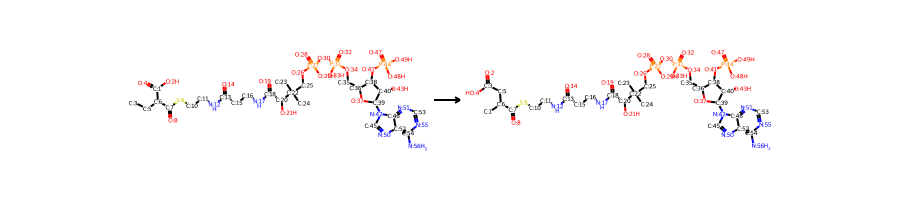

Mapping 2: 16573


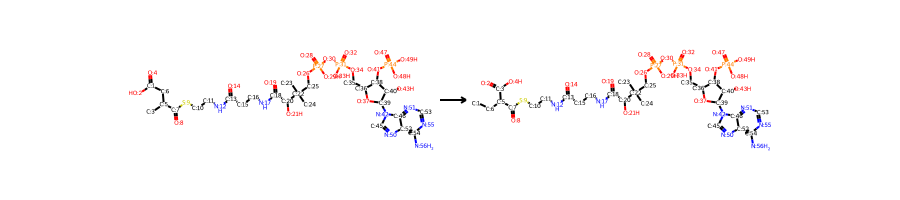

In [18]:
for i, row in enumerate(isom.iter_rows(named=True)):
    print(f"Mapping {i+1}: {row['rxn_id']}")
    display(
        SVG(
            draw_reaction(row['am_smarts'])
        )
    )

In [19]:
ni = pl.read_csv(
    "/home/stef/enz_rxn_data/artifacts/rules/ni_min_rules.tsv",
    separator="\t"
)

In [20]:
from ergochemics.mapping import extract_operator_patts

In [21]:
intra_dot = []
for row in ni.iter_rows(named=True):
    elts = extract_operator_patts(row['SMARTS'])
    for mol in elts[0]:
        if "." in mol:
            intra_dot.append(row)

In [22]:
len(intra_dot)

221

In [23]:
intra_dot

[{'Name': 'rule0028',
  'Reactants': 'Any',
  'SMARTS': '([#6:1].[#6:2]-[#6:3])>>([#6:2].[#6:1]-[#6:3])',
  'Products': 'Any',
  'Comments': 'A0A037YIF5;A0A067K3N5;A0A067ZIC8;A0A068Q609;A0A0A1H8D7;A0A0A1H8I4;A0A0A1HAT7;A0A0F6SCP6;A0A0F6VXD6;A0A0F6VXD9;A0A0F6VXE2;A0A0F6VXM2;A0A0F6YF18;A0A0H2UQY4;A0A0H2URG4;A0A140YIA2;A0A168GPL0;A0A168GPR3;A0A1D3TPC3;A0A1D3TXG7;A0A1T4LJY0;A0A223K4L6;A0LT86;A1A0H0;A1T974;A2EGX9;A2FT29;A2R3C7;A3C4S4;A3E7Z6;A3MUJ4;A3TM80;A4XGA6;A4XHV7;A4XJ56;A4YEG1;A5FA14;A5K8X6;A6UKD1;A6X7I5;A7LVG6;A8CEF6;A8DEZ8;A8RG82;A8YZE2;A9AYF3;A9LRT7;A9LS51;AE2015;AJH12524;AM180355;B0L964;B0M3E8;B1X789;B2ILS5;B2ZWT4;B2ZWT5;B3KMU8;B3WBA1;B3XZI5;B4FHU1;B5KJG2;B5KJG3;B5Z7L9;B6E5W6;B6VCW7;B7SLY1;B7XBM0;B8DZK4;B8DZQ9;B8E1T1;B8E1U6;B8LFE4;B8XP93;C0SSE7;C1FW08;C1JFF5;C1KKR1;C4LTW4;C5BUF0;C5MR76;C6K2K9;C6K2L0;C6VW66;C6XVU9;C6Y403;C7ACH5;C7AU21;C7G532;C8VAU8;CG9681;CYP153A11;CYP153A8;D0MF61;D1NPG0;D1TQG1;D2DK62;D2QDA5;D3JYW9;D5LNE5;D5MTT1;D7R810;D9ILD9;D9RZ53;D9SR73;D9TH31;D9TIY8;E0RU15;E3PRJ

In [24]:
mol = Chem.MolFromSmiles('CO')
patt = Chem.MolFromSmarts("[#6:1].[#8:2]")
mol.GetSubstructMatches(patt)

((0, 1),)

In [25]:
rxn = "C([C@@H]1[C@H]([C@@H]([C@H]([C@H](O1)OP(=O)(O)O)O)O)O)O>>C([C@@H]1[C@H]([C@@H]([C@H](C(O1)O)O)O)O)OP(=O)(O)O"
rule = '([#8:1].[#8:2]-[#15:3])>>([#8:2].[#8:1]-[#15:3])'
res = operator_map_reaction(rxn, rule)
res

[08:43:15] Initializing MetalDisconnector
[08:43:15] Running MetalDisconnector
[08:43:15] Initializing Normalizer
[08:43:15] Running Normalizer
[08:43:15] Initializing MetalDisconnector
[08:43:15] Running MetalDisconnector
[08:43:15] Initializing Normalizer
[08:43:15] Running Normalizer


OperatorMapResult(did_map=True, aligned_smarts='O=P(O)(O)OC1OC(CO)C(O)C(O)C1O>>O=P(O)(O)OCC1OC(O)C(O)C(O)C1O', atom_mapped_smarts='[O:14]=[P:3]([OH:15])([OH:16])[O:1][CH:8]1[O:6][CH:5]([CH2:4][OH:2])[CH:7]([OH:9])[CH:10]([OH:12])[CH:11]1[OH:13]>>[O:14]=[P:3]([OH:15])([OH:16])[O:2][CH2:4][CH:5]1[O:6][CH:8]([OH:1])[CH:11]([OH:13])[CH:10]([OH:12])[CH:7]1[OH:9]', reaction_center=(((9, 4, 1),), ((1, 4, 9),)))

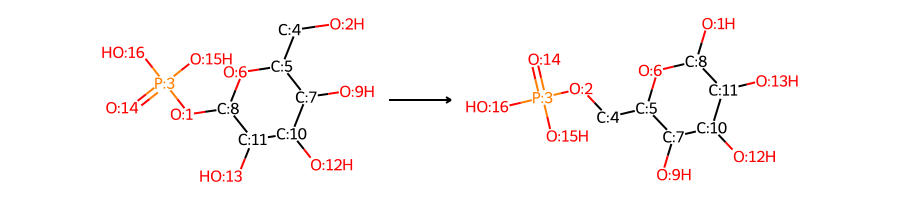

In [26]:
display(
    SVG(
        draw_reaction(res.atom_mapped_smarts)
    )
)